# Assignment 1
_Abdulkadir Çelikkanat_

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D

### Problem 1 (Uniform samples from a circular region)

Let $R \sim p(r)$, and $\theta \sim \mathcal{U}(0,2\pi)$
where 

\begin{eqnarray}
p(r) & \sim & \left\{
\begin{array}{cc} 
2r & 0 \leq r \leq 1 \\
0 & otherwise \\
\end{array} \right.
\end{eqnarray}

Then, the CDF of random variable $\textit{R}$ can be found as F(r) = $\int_{0}^{1}2rdr$ = $r^2$ so   

\begin{eqnarray}
F(r) & = & \left\{
\begin{array}{cc} 
0 & r < 0 \\
r^{2} & 0 \leq r \leq 1 \\
1 & r > 1 \\
\end{array} \right.
\end{eqnarray}
        
Hence the generalized inverse is found as r = $F^{-}(u)$ = $\sqrt{u}$ where $u \sim \textit{U}(0,1)$  
Now, samples can be obtained from the desired distributions.

In [2]:
# Converts polar coor. to cartesian coor.
def pol2cart(r, theta):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return (x,y)

In [3]:
# Uniformly picks points from the unit disk
def sampleFromDisk(N):
    # Draw samples from p(r) by using inversion method
    u = np.random.uniform(0, 1, N)
    r = np.sqrt(u)
    # Draw uniform samples from [0, 2\pi]
    theta = np.random.uniform(0, 2*np.pi, N)

    # Convert polar coor. to cartesian coor.
    (x,y) = pol2cart(r,theta)
    
    return (x,y)

Now, the inversion method is simulated below for different input sizes

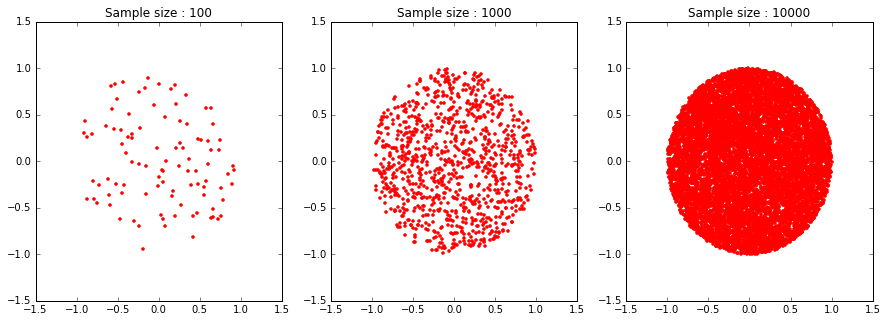

In [4]:
# test for different sample sizes
N = np.array([100,1000,10000])

f, axs = plt.subplots(1,3,figsize=(15,5))

for i in range(3):
    (x,y) = sampleFromDisk(N[i])

    # Plot the figure
    axs[i].plot(x,y,'r.')
    axs[i].set_xlim([-1.5, 1.5])
    axs[i].set_ylim([-1.5, 1.5])
    axs[i].set_title("Sample size : " + str(N[i]))
plt.show()

### Problem 2 (Rejection sampling)

In this problem, samples from the unit disk in different p-norms will be drawn by using rejection sampling method. In the implementation, the same function _sampleFromDisk(N)_ in the first question is used, which generates samples from the unit disk in 2-norm.

In [19]:
N = 1000
(u,v) = sampleFromDisk(N)

p1 = 1.5
p2 = 0.7

(p1_x, p1_y) = ([], [])
(p2_x, p2_y) = ([], [])
for i in range(N):

    p1_norm = np.linalg.norm([u[i],v[i]], ord=p1)
    if p1_norm <= 1:
        p1_x.append(u[i]), p1_y.append(v[i])
    
    p2_norm = np.linalg.norm([u[i],v[i]], ord=p2)
    if p2_norm <= 1:
        p2_x.append(u[i]), p2_y.append(v[i])



The prefixes _p1_ and _p2_ in the code above denote the 1.5-norm and 0.7-norm, respectively. The simulations and acceptance rates are given below.

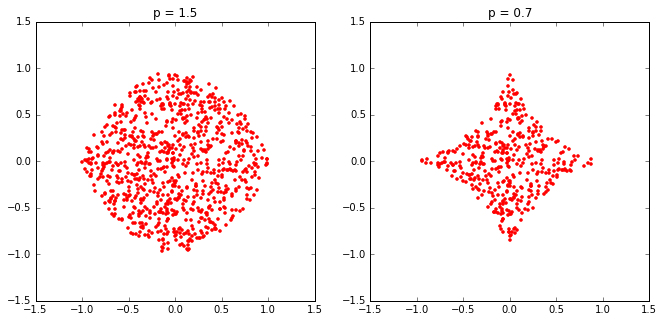

Acceptance rate : 0.422 for p = 0.7
Acceptance rate : 0.883 for p = 1.5


In [20]:
# Plot figures
f, (axs1, axs2) = plt.subplots(1,2,figsize=(11,5))
# For p = 1.5, 
axs1.plot(p1_x,p1_y,'r.')
axs1.axis([-1.5, 1.5, -1.5, 1.5])
axs1.set_title('p = 1.5')

# For p = 0.7, 
axs2.plot(p2_x,p2_y,'r.')
axs2.axis([-1.5, 1.5, -1.5, 1.5])
axs2.set_title('p = 0.7')

plt.show()
print "Acceptance rate : " + str(float(len(p2_x))/N) + " for p = " + str(p2)
print "Acceptance rate : " + str(float(len(p1_x))/N) + " for p = " + str(p1)



###### The efficiency of sampler for p = 0.7
To improve efficiency, samples are drawn from the unit square $\big[-\frac{\sqrt(2)}{2}, \frac{\sqrt(2)}{2}\big]^2$, and then rotated by $\pi/4$ as mentioned in the problem session.

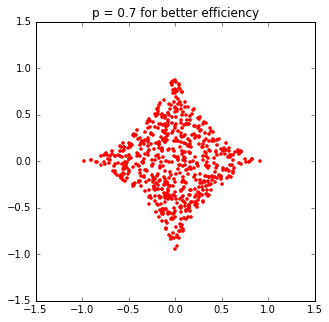

Acceptance rate : 0.65


In [7]:
N = 1000 # Number of samples

# Definiton of rotation matrix in counter clockwise direction
R = np.array([[np.sqrt(2.0)/2, -np.sqrt(2.0)/2], [np.sqrt(2.0)/2, np.sqrt(2.0)/2]])

# Draw random points from [-2^(0.5)/2, 2^(0.5)/2]
x = np.random.uniform(-np.sqrt(2.0)/2, np.sqrt(2.0)/2, N)
y = np.random.uniform(-np.sqrt(2.0)/2, np.sqrt(2.0)/2, N)

# Rotate points
[rx, ry] = R.dot([x, y])

(u ,v) = ([],[])
for i in range(N):
    if np.linalg.norm([rx[i],ry[i]], ord=0.7) <= 1:
        u.append(rx[i]), v.append(ry[i])
                       
# For p = 0.7, 
plt.figure(figsize=(5,5))
plt.plot(u, v,'r.')
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.title('p = 0.7 for better efficiency')
plt.show()
print "Acceptance rate : " + str(float(len(u))/N)

### Problem 3 (Bonus question)  
__First method__  
To obtain a random direction uniformly in the n-dimensional space, a sample from n-variate gaussian with identity covariance can be generated, and then normalized as mentioned in the problem description. After obtaining a uniform direction in this way, a radius can be chosen from the distribution p(r) = $nr^{n-1}$, 0 $\leq r \leq$ 1, so an uniformly distributed point $u^{\frac{1}{n}}x$ over n-ball is obtained where $u \sim [0,1]$ and ___x___ is a point selected uniformly from surface of n-ball as described in [1]. 


In [8]:
def sampleFromBall_1(N,n):
    # N : number of samples
    # n : dimension
    
    # Draw samples from N(0,1)
    samples = np.random.randn(N,n)
    # Normalize the vectors to obtain directions
    direc = samples / np.linalg.norm(samples,ord=2,axis=1,keepdims=1)

    # Uniformly choose radius
    rad = np.random.uniform(0,1,(N,1))**(1.0/n)
    
    return (direc*rad)

An illustration of the first method is given below for 3-dimensional space

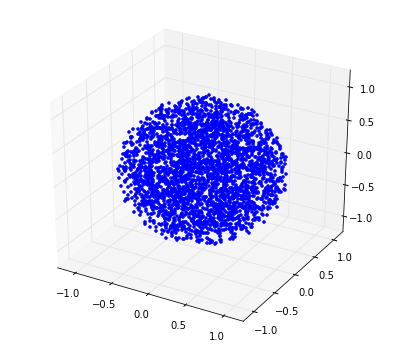

In [9]:
N = 3000 #sample size
points = sampleFromBall_1(N,3)
# Plot figure
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(121, projection='3d')
ax.plot(points[:,0],points[:,1],points[:,2],'b.')
ax.set_xlim3d(-1.2,1.2)
ax.set_ylim3d(-1.2,1.2)
ax.set_zlim3d(-1.2,1.2)
plt.show()

__Second Method__  
In the second method, the rejection sampling is used, and points are sampled from the n-cube, which remaining inside the nball are accepted, and others are discarded.

In [10]:
def sampleFromBall_2(N, n):
    # N : number of samples
    # n : dimension
    # returns acceptance rate
    
    # Draw sample points from [-1,1]^n
    samples = np.random.uniform(-1,1,(N,n)) 

    pts = []
    for i in range(N):
        if np.linalg.norm(samples[i],ord=2) <= 1:
            pts.append(samples[i])
    
    return float(len(pts))/N        

The function below '_getTrueRatio(n)_' gives the ratio of volumes of n-ball and n-cube according to equations described in [2]. This function later will be used to compare the accaptance rates and real ratios.

In [11]:
def getTrueRatio(n):
    
    if n%2 == 0:
        k = n/2
        V = ((np.pi)**k) / math.factorial(k)
    else:
        k = (n-1)/2
        V = (2*math.factorial(k)*(4*np.pi)**k) / (math.factorial(2*k+1))
    
    return V / (2**n)

Now, acceptance rates and ratios of nball and ncube are depicted from 2 to 10 dimension.

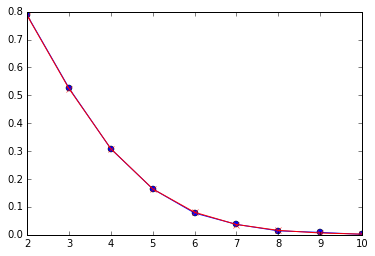

Acceptance rates : 
[ 0.787   0.5256  0.3079  0.1644  0.078   0.0373  0.0142  0.0086  0.0016]
The ratios of volumes of n-ball and n-cube : 
[ 0.7854  0.5236  0.3084  0.1645  0.0807  0.0369  0.0159  0.0064  0.0025]


In [12]:
maxDim = 10 # Maximum dimension size
N = 10000 # number of samples

# Get acceptance rates from 2 to 10 dimensions
acceptRate = [sampleFromBall_2(N,dim) for dim in np.arange(2,maxDim+1)]
# Get true ratios of volumes of ncube and nball.
trueRate = [getTrueRatio(dim) for dim in range(2,maxDim+1)]
x = np.arange(2,maxDim+1)

plt.plot(x,acceptRate,'-bo',x,trueRate,'-rx')
plt.show()

print "Acceptance rates : "
print np.around(acceptRate,decimals=4)
print "The ratios of volumes of n-ball and n-cube : "
print np.around(trueRate, decimals=4)

It does not seem clearly, but there exists two lines, red and blue, and which are close to each other.

#### References
[1] https://en.wikipedia.org/wiki/N-sphere#Uniformly_at_random_from_the_n-ball  
[2] https://en.wikipedia.org/wiki/N-sphere#Closed_forms